In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
test_original=test.copy()

In [3]:
train.head()


,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [4]:
test.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
dtype: object

In [5]:
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
premium                               int64
target                                int64
dtype: object

# Data Visualization

In [6]:
train.shape , test.shape

((79853, 13), (34224, 11))

Univariate Analysis

In [7]:
#categorical variables
train['target'].value_counts(normalize=True)

1    0.93741
0    0.06259
Name: target, dtype: float64

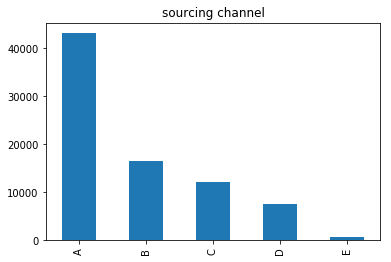

In [8]:
train['sourcing_channel'].value_counts().plot.bar(title='sourcing channel')

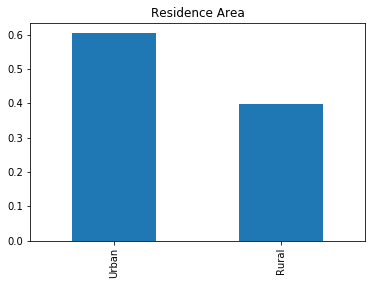

In [9]:
train['residence_area_type'].value_counts(normalize=True).plot.bar(title='Residence Area')

Inference- More than 50% is A sourcing channel and urban dwellers

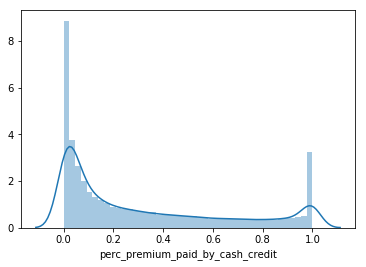

In [10]:
#Continuous Variables
sns.distplot(train['perc_premium_paid_by_cash_credit'])


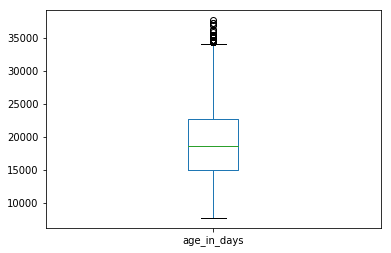

In [11]:
train['age_in_days'].plot.box()

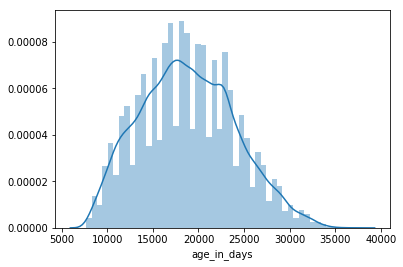

In [12]:
sns.distplot(train['age_in_days'])

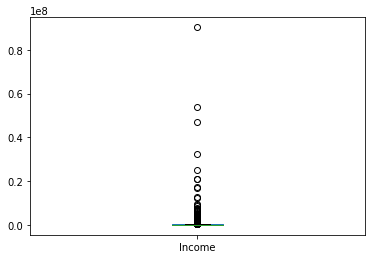

In [13]:
train['Income'].plot.box()

# Bivariate Analysis

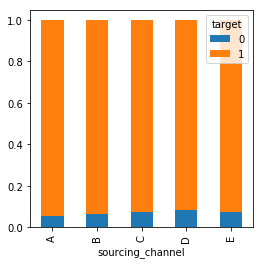

In [14]:
#Categorical Variables
source=pd.crosstab(train['sourcing_channel'],train['target']) 
source.div(source.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

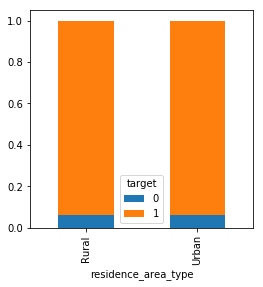

In [15]:
residence=pd.crosstab(train['residence_area_type'],train['target']) 
residence.div(residence.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Almost same target=1 by both categorical variables. Neglect residence area type

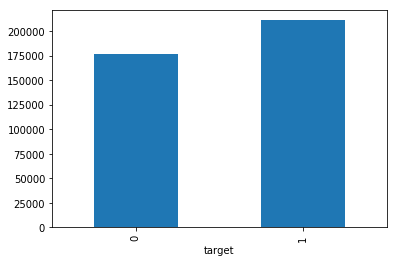

In [16]:
train.groupby('target')['Income'].mean().plot.bar()

income is included

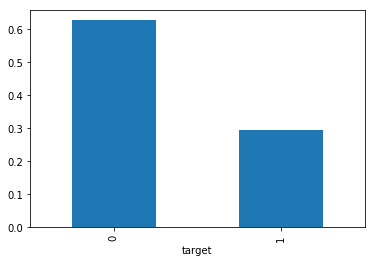

In [17]:
train.groupby('target')['perc_premium_paid_by_cash_credit'].mean().plot.bar()

Perc_cash is included

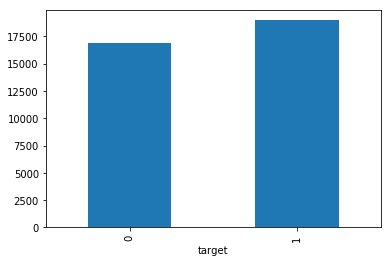

In [18]:
train.groupby('target')['age_in_days'].mean().plot.bar()

age is included

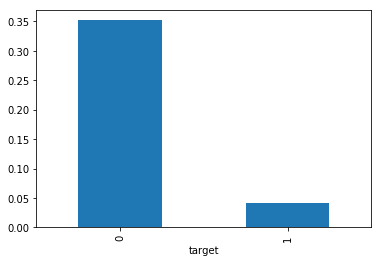

In [19]:
train.groupby('target')['Count_more_than_12_months_late'].mean().plot.bar()

counts all included

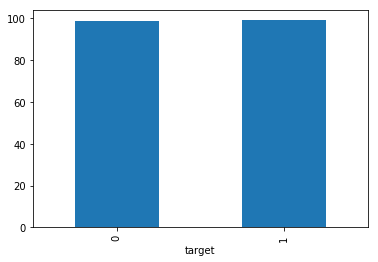

In [20]:
train.groupby('target')['application_underwriting_score'].mean().plot.bar()

ap_score not included

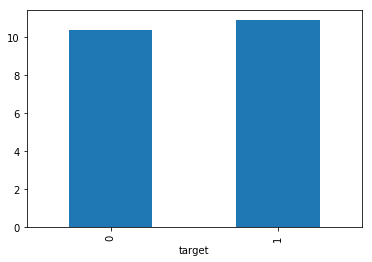

In [21]:
train.groupby('target')['no_of_premiums_paid'].mean().plot.bar()

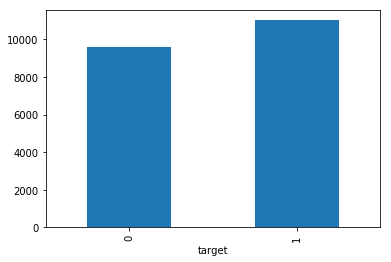

In [22]:
train.groupby('target')['premium'].mean().plot.bar()

premium included

premium,age,counts all,perc_cash,income,sourcing_channel included

In [23]:
train=train.drop(['application_underwriting_score','no_of_premiums_paid','residence_area_type','id','premium'],axis=1)

# Missing value Treatment

In [24]:
train.isnull().sum()

perc_premium_paid_by_cash_credit     0
age_in_days                          0
Income                               0
Count_3-6_months_late               97
Count_6-12_months_late              97
Count_more_than_12_months_late      97
sourcing_channel                     0
target                               0
dtype: int64

In [25]:
train['Count_3-6_months_late'].fillna(train['Count_3-6_months_late'].median(), inplace=True)

In [26]:
train['Count_6-12_months_late'].fillna(train['Count_6-12_months_late'].median(), inplace=True)

In [27]:
train['Count_more_than_12_months_late'].fillna(train['Count_more_than_12_months_late'].median(), inplace=True)

In [28]:
train.isnull().sum()

perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
sourcing_channel                    0
target                              0
dtype: int64

In [29]:
train.dtypes

perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
sourcing_channel                     object
target                                int64
dtype: object

# Outliers Treatment

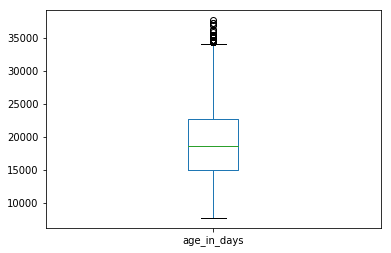

In [30]:
train['age_in_days'].plot.box()

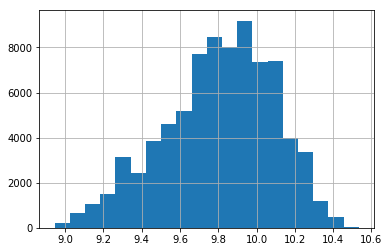

In [31]:
train['age_in_days'] = np.log(train['age_in_days']) 
train['age_in_days'].hist(bins=20) 
test['age_in_days'] = np.log(test['age_in_days'])

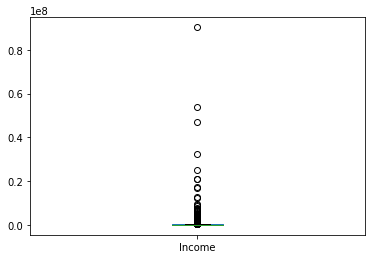

In [32]:
train['Income'].plot.box()

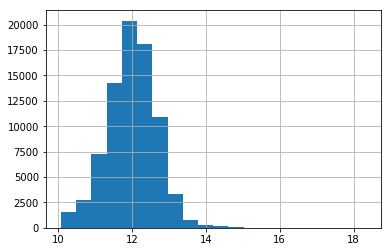

In [33]:
train['Income'] = np.log(train['Income']) 
train['Income'].hist(bins=20) 
test['Income'] = np.log(test['Income'])

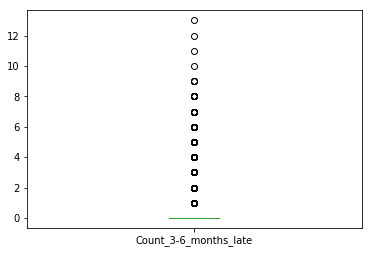

In [34]:
train['Count_3-6_months_late'].plot.box()

In [35]:
#train['premium'].plot.box()

In [36]:
#train['premium'] = np.log(train['premium']) 
#train['premium'].hist(bins=20) 


# Model Fitting

In [37]:
X = train.drop('target',1) 
y = train.target

In [38]:
#creating dummies for soucing channel(categorical)
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)


In [39]:
np.nan_to_num(X)
np.nan_to_num(y)


array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [40]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(X,y)

C:\Users\Maverick\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
pred = model.predict(X)

In [42]:
accuracy_score(y,pred)

0.9393134885351834

In [43]:
X.dtypes

perc_premium_paid_by_cash_credit    float64
age_in_days                         float64
Income                              float64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
sourcing_channel_A                    uint8
sourcing_channel_B                    uint8
sourcing_channel_C                    uint8
sourcing_channel_D                    uint8
sourcing_channel_E                    uint8
dtype: object

In [44]:
test.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                         float64
Income                              float64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel_A                    uint8
sourcing_channel_B                    uint8
sourcing_channel_C                    uint8
sourcing_channel_D                    uint8
sourcing_channel_E                    uint8
residence_area_type_Rural             uint8
residence_area_type_Urban             uint8
dtype: object

In [45]:
x_test=test.drop(['no_of_premiums_paid','residence_area_type_Rural','residence_area_type_Urban','application_underwriting_score','id'],axis=1)

In [46]:
x_test.dtypes

perc_premium_paid_by_cash_credit    float64
age_in_days                         float64
Income                              float64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
sourcing_channel_A                    uint8
sourcing_channel_B                    uint8
sourcing_channel_C                    uint8
sourcing_channel_D                    uint8
sourcing_channel_E                    uint8
dtype: object

In [47]:
x_test.isnull().sum()

perc_premium_paid_by_cash_credit     0
age_in_days                          0
Income                               0
Count_3-6_months_late               31
Count_6-12_months_late              31
Count_more_than_12_months_late      31
sourcing_channel_A                   0
sourcing_channel_B                   0
sourcing_channel_C                   0
sourcing_channel_D                   0
sourcing_channel_E                   0
dtype: int64

In [48]:
x_test['Count_3-6_months_late'].fillna(test['Count_3-6_months_late'].median(), inplace=True)
x_test['Count_6-12_months_late'].fillna(test['Count_6-12_months_late'].median(), inplace=True)
x_test['Count_more_than_12_months_late'].fillna(test['Count_more_than_12_months_late'].median(), inplace=True)


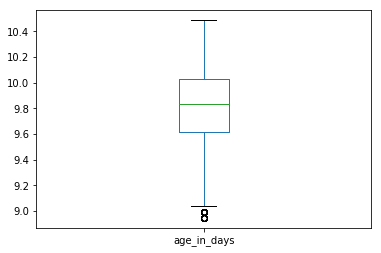

In [49]:
x_test['age_in_days'].plot.box()

In [50]:
x_test['age_in_days']=np.log(test['age_in_days'])


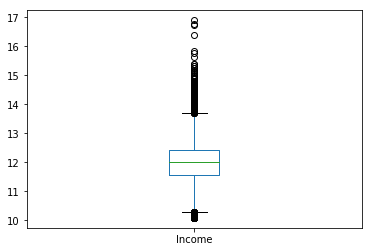

In [51]:
x_test['Income'].plot.box()

In [52]:
x_test['Income']=np.log(test['Income'])

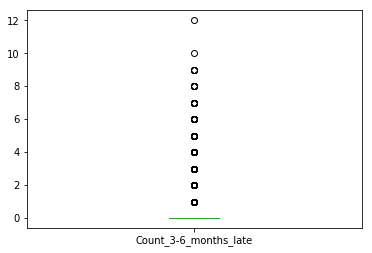

In [53]:
x_test['Count_3-6_months_late'].plot.box()

In [54]:
x_test=pd.get_dummies(x_test)
np.nan_to_num(x_test)

array([[1.00000000e-03, 2.32412290e+00, 2.38347524e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.24000000e-01, 2.31002793e+00, 2.53057572e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.27736153e+00, 2.49598367e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.25000000e-01, 2.28367616e+00, 2.50051535e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.83000000e-01, 2.27511267e+00, 2.50675366e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e-03, 2.31303832e+00, 2.43348389e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [55]:
pred_test = model.predict(x_test)

In [56]:
submission=pd.read_csv("sample_submission_ger7W7I.csv")

In [57]:
submission['target']=pred_test

In [58]:
submission['id']=test_original['id']
submission.to_csv('Best.csv', index=False)